In [21]:
from trafalgar import*

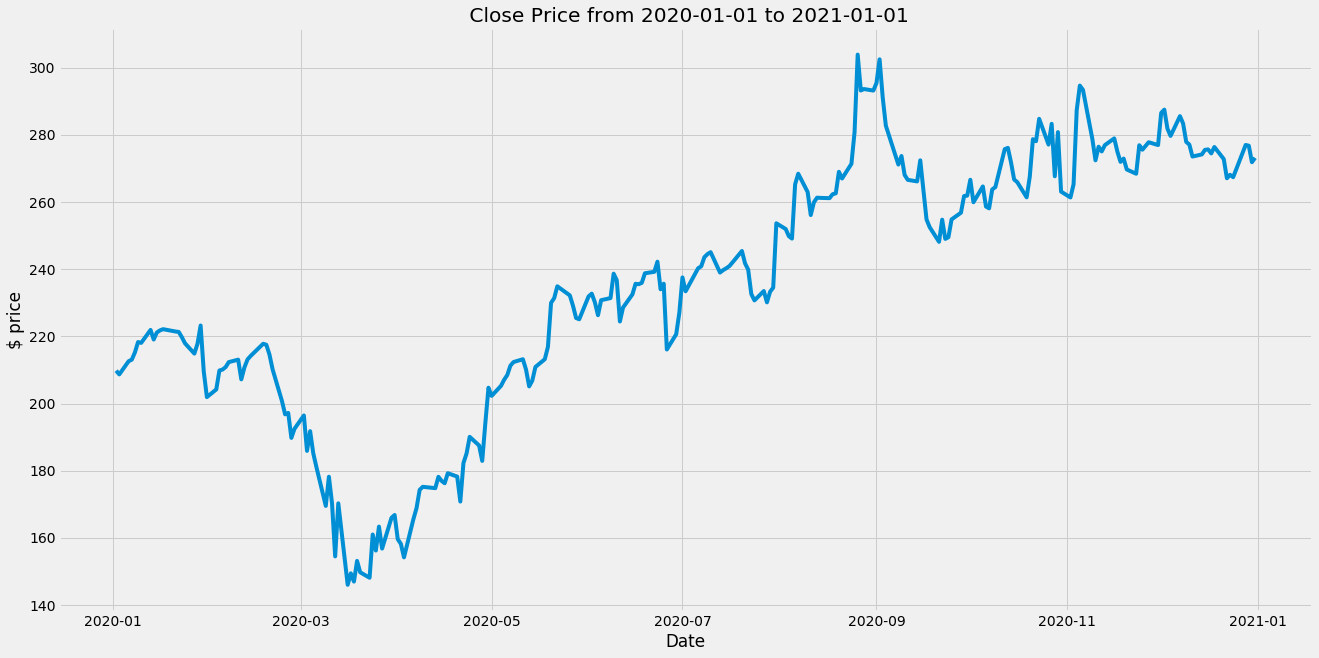

In [22]:
graph_close(["FB"], "2020-01-01", "2021-01-01")